# Generation of sines
In this notebook, the data for experiment 1 and 2 of the thesis is generated.

In [1]:
from data_loading import generate_sine_wave, add_additional_sine
import pandas as pd
import matplotlib.pyplot as plt

2024-05-13 11:54:11.019047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 11:54:11.710169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 11:54:11.722230: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 11:54:14.075305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


### Simple sine generation

Random generation uses seed 123
Angular frequency: 0.043955698570578274
Frequency: 0.27618179942547216
Angular frequency: 0.07219600563377651
Frequency: 0.45362088183519916
Angular frequency: 0.11150386384041479
Frequency: 0.7005994389758473
Angular frequency: 0.08245833835665274
Frequency: 0.5181010200169635
Angular frequency: 0.10759563444550842
Frequency: 0.6760433094646843
Angular frequency: 0.0666235847089068
Frequency: 0.41860832855463775
The generated multivariate time series has the shape (1000, 6)


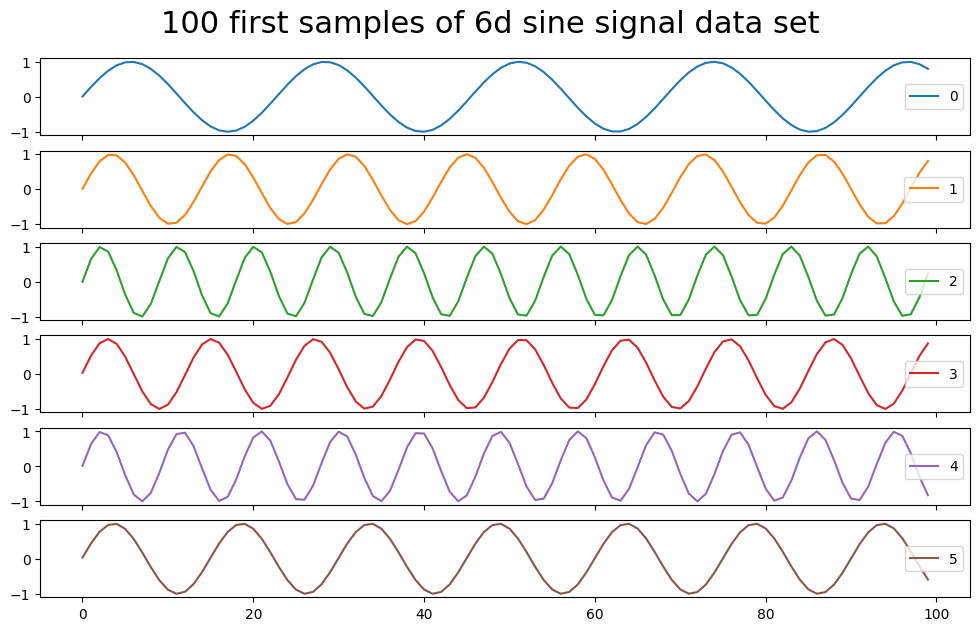

In [2]:
seed = 123          # Initial seed for random generation, if not specified it's random
dim = 6             # Number of features in the multivariate series
n = 1000            # Number of samples
deterministic = False # No randomness will be applied if true
clip_length = 100

sines = generate_sine_wave(dim, n, seed, deterministic)
df = pd.DataFrame(sines)
print(f'The generated multivariate time series has the shape {df.shape}')
axes = df[:clip_length].plot(subplots=True, figsize=(12,7), title=f'{clip_length} first samples of 9d sine signal data set')
# flatten the array
axes = axes.flat  # .ravel() and .flatten() also work

# extract the figure object to use figure level methods
fig = axes[0].get_figure()

# iterate through each axes to use axes level methods
for ax in axes:
    
    ax.legend(loc='right')
    
fig.suptitle(f'{clip_length} first samples of {dim}d sine signal data set', fontsize=22, y=0.95)
plt.show()
# df.to_csv(f'sine_data/sine_{seed}_{n}_{dim}.csv', index=False)
# df.to_csv(f'sine_data/sine_{seed}_{n}_{dim}.csv')

### Generation of more complex sines

Random generation uses seed 124
Angular frequency: 0.11624523910555741
Frequency: 0.7303903783776162
Length of the original sines are 1000 and the length og the additional sine is 1000


<Axes: >

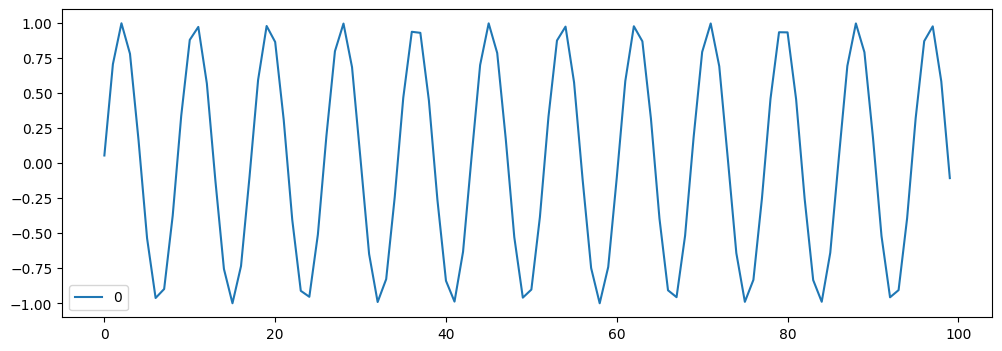

In [3]:
new_seed = 124
add_sine_len = df.shape[0]
add_sine = pd.DataFrame(generate_sine_wave(1, add_sine_len, new_seed, deterministic=False))
updated_sines = add_additional_sine(df, add_sine)

# updated_sines.to_csv(f'complex_sine_data/comp_sine_{seed}_{n}_{dim}.csv', index=False) #Use for 2d+
# updated_sines.to_csv(f'complex_sine_data/comp_sine_{seed}_{n}_{dim}.csv') #Use for 1d

add_sine.iloc[:100].plot(figsize=(12, 4))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

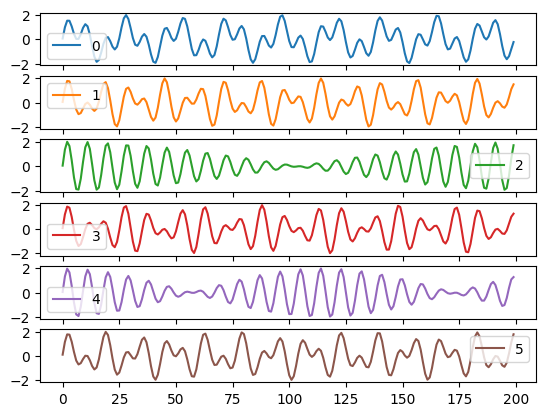

In [4]:
# print(f'{type(updated_sines)}')
updated_sines.iloc[:200].plot(subplots=True)

### A third added sine wave

Random generation uses seed 126
Angular frequency: 0.08535294495588439
Frequency: 0.5362883696713208
Length of the original sines are 1000 and the length og the additional sine is 1000


<Axes: >

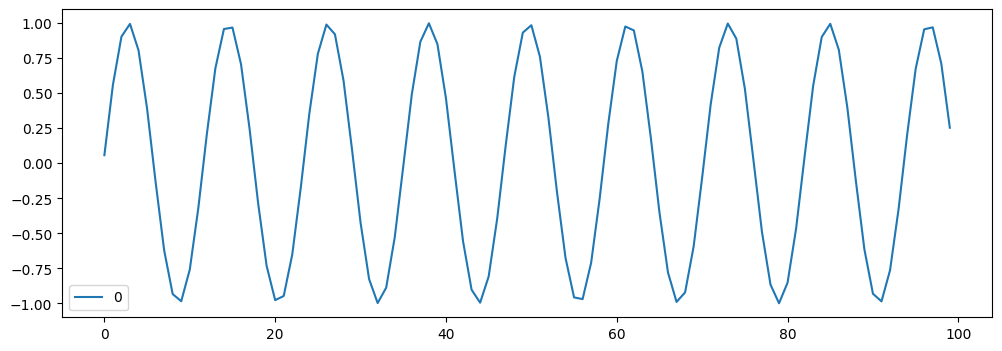

In [5]:
new_seed = 126 #Seed 125 gave to similar results to seed 124
add_sine_len = updated_sines.shape[0]
add_sine2 = pd.DataFrame(generate_sine_wave(1, add_sine_len, new_seed, deterministic=False))
updated_sines2 = add_additional_sine(updated_sines, add_sine2)

updated_sines2.to_csv(f'complex_sine_data/extra_comp_sine_{seed}_{n}_{dim}.csv', index=False) #Use for 2d+
# updated_sines.to_csv(f'complex_sine_data/comp_sine_{seed}_{n}_{dim}.csv') #Use for 1d

add_sine2.iloc[:100].plot(figsize=(12, 4))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

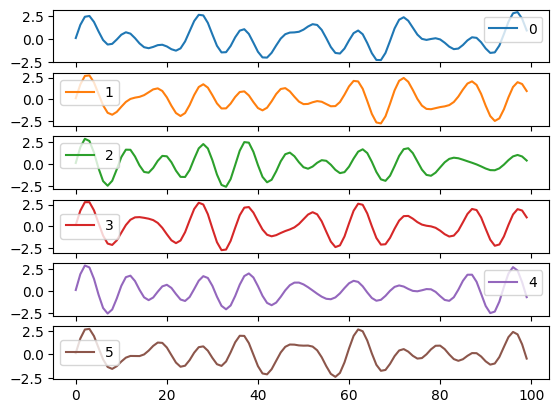

In [7]:
updated_sines2.iloc[:100].plot(subplots=True)